In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# 데이터과학에 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
#판다스로 질문 데이터를 가져옴
question = pd.read_csv('schema.csv')

In [3]:
question.shape

(290, 3)

In [4]:
question.columns

Index(['Column', 'Question', 'Asked'], dtype='object')

In [5]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [6]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [7]:
#판다스로 객관식 문제 응답을 가져옴.
mcq = pd.read_csv('multipleChoiceResponses.csv' , encoding = 'ISO-8859-1')

In [8]:
mcq.shape

(16716, 228)

In [9]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [10]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import missingno as msno

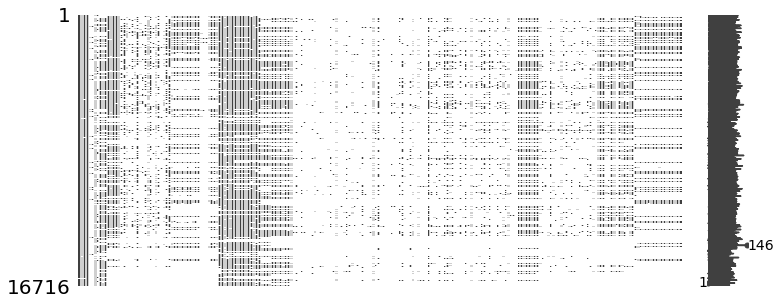

In [12]:
msno.matrix(mcq, figsize = (12,5))

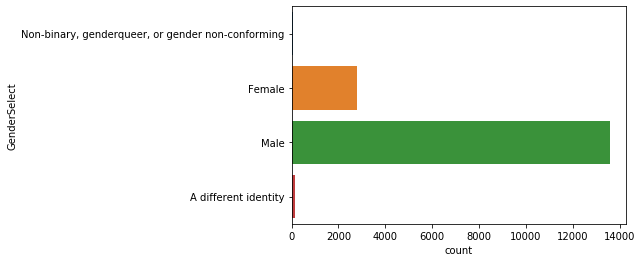

In [13]:
#성별
sns.countplot(y='GenderSelect', data = mcq)

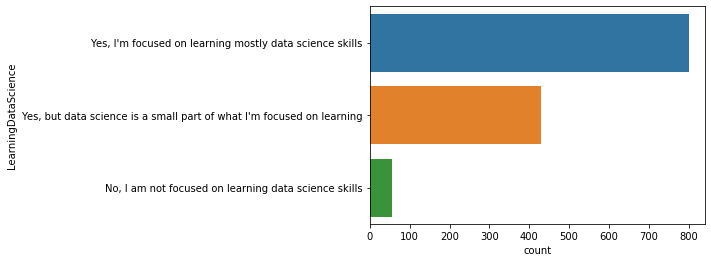

In [14]:
#데이터사이언스 학습정도
sns.countplot(y = 'LearningDataScience' , data = mcq)

In [22]:
con_df = pd.DataFrame(mcq['Country'].value_counts())

In [23]:
print(con_df)

                             Country
United States                   4197
India                           2704
Other                           1023
Russia                           578
United Kingdom                   535
People 's Republic of China      471
Brazil                           465
Germany                          460
France                           442
Canada                           440
Australia                        421
Spain                            320
Japan                            277
Taiwan                           254
Italy                            238
Netherlands                      205
Ukraine                          196
South Korea                      194
Poland                           184
Singapore                        184
Pakistan                         161
Turkey                           144
Indonesia                        131
Switzerland                      129
South Africa                     127
Mexico                           126
C

In [24]:
#Country 컬럼을 인덱스로 지정
con_df['con'] = con_df.index

In [25]:
#응답자수와 국가명 컬럼 지정 , 응답자 순으로 소팅한다.
con_df.columns = ['ans' , 'con']

In [26]:
con_df

,ans,con
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom
People 's Republic of China,471,People 's Republic of China
Brazil,465,Brazil
Germany,460,Germany
France,442,France
Canada,440,Canada


In [27]:
con_df = con_df.reset_index().drop('index' , axis = 1)

In [29]:
con_df.head(20)

,ans,con
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [30]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

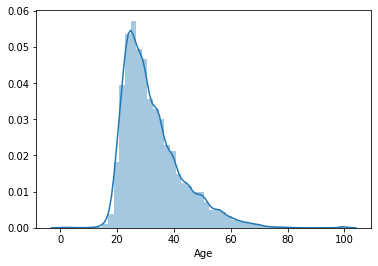

In [32]:
#Age = 비율척도, 히스토그램
sns.distplot(mcq[mcq['Age']>0]['Age'])

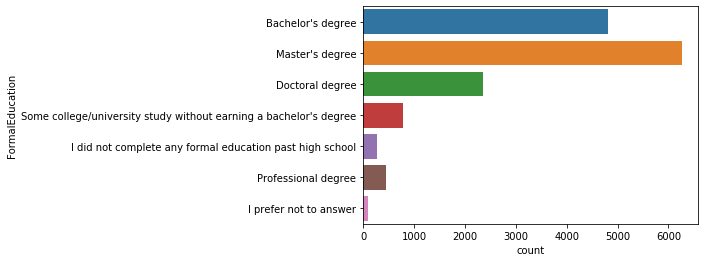

In [35]:
#FormalEducation = 명목척도, 막대그래프
sns.countplot(y='FormalEducation' , data = mcq)

In [36]:
#MajorSelect = 명목척도, 막대그래프
pd.DataFrame(mcq['MajorSelect'].value_counts())

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


In [40]:
#전공자 비율 (normalize = True)
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())

In [41]:
mcq_major_count

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


In [47]:
mcq_major_ratio = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))

In [48]:
mcq_major_ratio

,MajorSelect
Computer Science,0.331074
Mathematics or statistics,0.167156
Engineering (non-computer focused),0.100821
Electrical Engineering,0.098110
Other,0.063851
Physics,0.062495
"Information technology, networking, or system administration",0.052180
A social science,0.039982
Biology,0.020631
Management information systems,0.017845


In [51]:
mcq_major_data = mcq_major_count.merge(mcq_major_ratio, left_index = True, right_index = True)
mcq_major_data.columns = ['응답자' , '비율']

In [52]:
mcq_major_data

,응답자,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


In [55]:
mcq_major_percent = pd.DataFrame((mcq['MajorSelect'].value_counts(normalize = True))*100)

In [56]:
mcq_major_percent

,MajorSelect
Computer Science,33.107447
Mathematics or statistics,16.715609
Engineering (non-computer focused),10.082072
Electrical Engineering,9.811008
Other,6.385061
Physics,6.249529
"Information technology, networking, or system administration",5.217981
A social science,3.998193
Biology,2.063098
Management information systems,1.784504


In [66]:
mcq_major_df = mcq_major_data.merge(mcq_major_percent, left_index = True,right_index = True)
mcq_major_df.columns = ['응답자' , '비율' , '퍼센트']

In [68]:
mcq_major_df.head(5)

,응답자,비율,퍼센트
Computer Science,4397,0.331074,33.107447
Mathematics or statistics,2220,0.167156,16.715609
Engineering (non-computer focused),1339,0.100821,10.082072
Electrical Engineering,1303,0.098110,9.811008
Other,848,0.063851,6.385061


In [73]:
mcq_major_df['Major'] = mcq_major_df.index

In [74]:
mcq_major_df

,응답자,비율,퍼센트,Major
Computer Science,4397,0.331074,33.107447,Computer Science
Mathematics or statistics,2220,0.167156,16.715609,Mathematics or statistics
Engineering (non-computer focused),1339,0.100821,10.082072,Engineering (non-computer focused)
Electrical Engineering,1303,0.098110,9.811008,Electrical Engineering
Other,848,0.063851,6.385061,Other
Physics,830,0.062495,6.249529,Physics
"Information technology, networking, or system administration",693,0.052180,5.217981,"Information technology, networking, or system ..."
A social science,531,0.039982,3.998193,A social science
Biology,274,0.020631,2.063098,Biology
Management information systems,237,0.017845,1.784504,Management information systems


In [75]:
mcq_major_df.columns = ['응답자' , '비율' , '퍼센트' , '전공']

In [78]:
mcq_major_df

,응답자,비율,퍼센트,전공
0,4397,0.331074,33.107447,Computer Science
1,2220,0.167156,16.715609,Mathematics or statistics
2,1339,0.100821,10.082072,Engineering (non-computer focused)
3,1303,0.098110,9.811008,Electrical Engineering
4,848,0.063851,6.385061,Other
5,830,0.062495,6.249529,Physics
6,693,0.052180,5.217981,"Information technology, networking, or system ..."
7,531,0.039982,3.998193,A social science
8,274,0.020631,2.063098,Biology
9,237,0.017845,1.784504,Management information systems


In [77]:
mcq_major_df = mcq_major_df.reset_index().drop('index' , axis = 1)

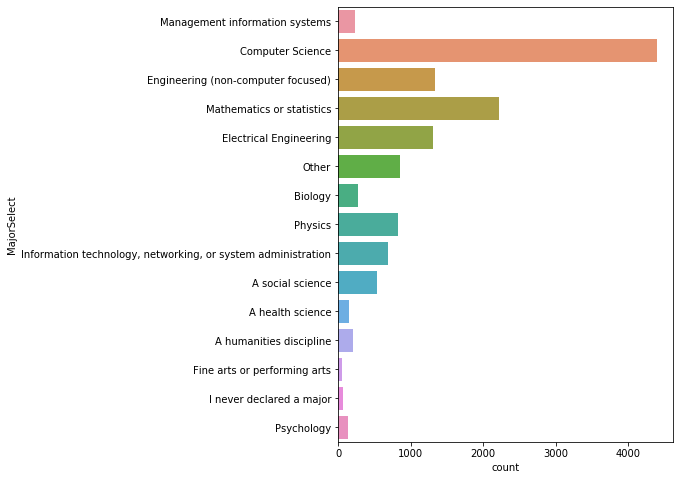

In [82]:
plt.figure(figsize = (6,8))
sns.countplot(y='MajorSelect' , data = mcq)

In [83]:
# 한국 인포
korea = mcq.loc[(mcq['Country']=='South Korea')]
print ('한국 응답자 : ' + str(korea.shape[0]))

한국 응답자 : 194


In [89]:
#한글 폰트
fontpath = "/usr/share/fonts/RIDIBatang.otf"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=fontpath).get_name()
rc('font', family=font_name)

Text(0.5, 1.0, '한국인')

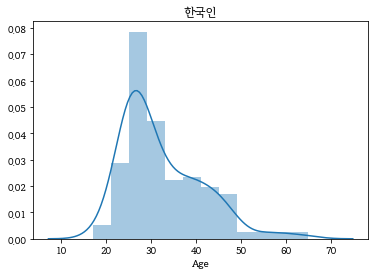

In [92]:
sns.distplot(korea['Age'].dropna())
plt.title('한국인')

In [93]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


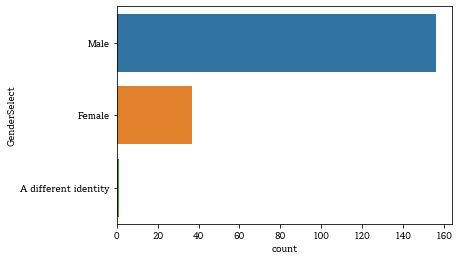

In [94]:
sns.countplot(y='GenderSelect' , data = korea)

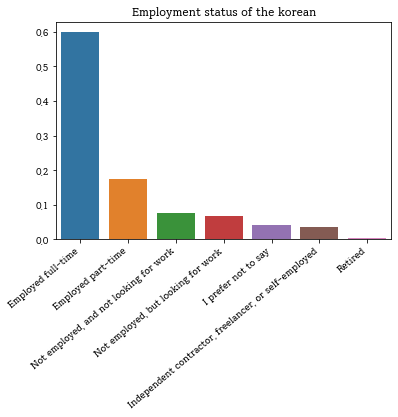

In [100]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=40, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

In [101]:
k_emp = pd.DataFrame(korea['EmploymentStatus'].value_counts())

In [102]:
k_emp.columns = ['취업여부']

In [103]:
k_emp

,취업여부
Employed full-time,116
"Not employed, but looking for work",34
"Not employed, and not looking for work",15
"Independent contractor, freelancer, or self-employed",13
I prefer not to say,8
Employed part-time,7
Retired,1
